# Лабораторная работа 5. Цветовая сегментация
> Выполнена студентом: **Гришин Е.В. 22ВВИм2**


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np

image_path = 'images/lab5.jpg'

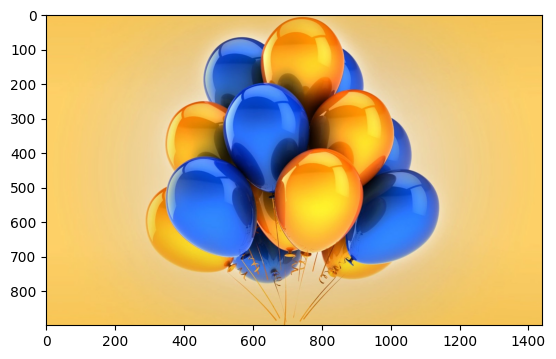

In [2]:
bgr_image = cv.imread(image_path)
plt.imshow(cv.cvtColor(bgr_image, cv.COLOR_BGR2RGB))

In [3]:
def plot_hsv(img):
    for layer in range(img.shape[-1]):
        layer_values = img[..., layer].flatten()
        sns.kdeplot(layer_values)
    plt.legend(title='HSV image', loc='upper left', labels=['Hue', 'Saturation', 'Value'])

In [4]:
hsv_image = cv.cvtColor(bgr_image, cv.COLOR_BGR2HSV)
# plot_hsv(hsv_image)

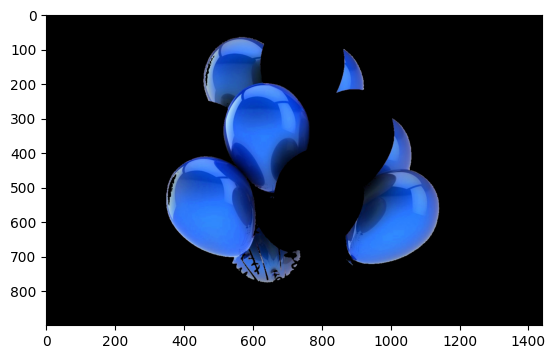

In [5]:
mask = cv.inRange(hsv_image[..., 0], 100, 125)
for layer in range(hsv_image.shape[-1]):
    hsv_image[..., layer] = cv.bitwise_and(mask, hsv_image[..., layer])

plt.imshow(cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB))

In [6]:
# plot_hsv(hsv_image)

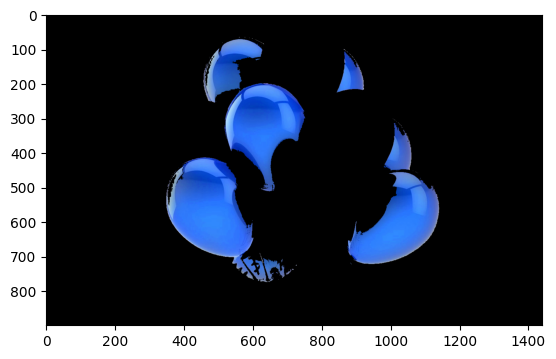

In [7]:
mask = cv.inRange(hsv_image[..., 2], 170, 255)
# mask = cv.morphologyEx(mask, cv.MORPH_OPEN, np.ones((4, 4), dtype='uint8'))
for layer in range(hsv_image.shape[-1]):
    hsv_image[..., layer] = cv.bitwise_and(mask, hsv_image[..., layer])

plt.imshow(cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB))

In [8]:
points = []
x_sz, y_sz = mask.shape
for i in range(x_sz):
    for j in range(y_sz):
        if mask[i][j]:
            points.append([j, x_sz - i])

points = np.array(points)

In [9]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=4, min_samples=25)
clusters = model.fit_predict(points)

# Remove outliers
points = points[clusters != -1]
clusters = clusters[clusters != -1]

n_clusters = len(np.unique(clusters))
print(f'There is total of {n_clusters} bloons')

There is total of 7 bloons


<Axes: >

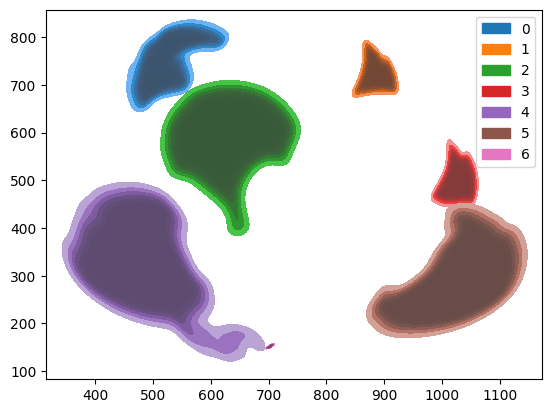

In [10]:
sns.kdeplot(x=points[:, 0], y=points[:, 1], hue=clusters, fill=True, palette='tab10')

*__Кластеризация заметила 7 шаров__*

Несмотря на то, что один из них очень спорный огрызок от нижнего труднораспознаваемого шара